# Question 1
 Compute the sparsity of the movie rating dataset, where sparsity is defined by equation 1

In [1]:
import csv
import numpy as np
import pandas as pd

#Load rating csv file and extract rating info

data=pd.read_csv('ratings.csv')#Please change this path into the absolute path to"ratings.cvs"
rating=data.pivot(index='userId',columns='movieId',values='rating')
print(type(data))
print(type(rating))
print(rating.shape)
available_rating=np.count_nonzero(~np.isnan(rating))#count all nonzero value excluding NaN entries
print('The total number of available_rating is')
print(available_rating)
total_rating=rating.shape[0]*rating.shape[1]
print('The total number of possible_rating is')
print(total_rating)
sparsity=np.float(available_rating/total_rating)
print('The sparsity of the rating matrix is')
print(sparsity)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(610, 9724)
The total number of available_rating is
100836
The total number of possible_rating is
5931640
The sparsity of the rating matrix is
0.016999683055613623


# Question 2
Plot a histogram showing the frequency of the rating values. To be speciﬁc, bin the rating values into intervals of width 0.5 and use the binned rating values as the horizontal axis. Count the number of entries in the ratings matrix R with rating values in the binned intervals and use this count as the vertical axis. Brieﬂy comment on the shape of the histogram


The maximum rating value is
5.0
The minimum rating value is
0.5


([<matplotlib.axis.XTick at 0x110305dd0>,
 <a list of 10 Text xticklabel objects>)

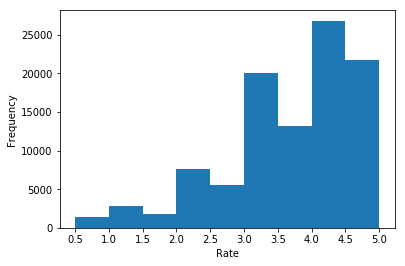

In [2]:
#Observe the max rating and min rating
import matplotlib.pyplot as plt
max_rating=np.max(data['rating'].values)
min_rating=np.min(data['rating'].values)
print('The maximum rating value is')
print(max_rating)
print('The minimum rating value is')
print(min_rating)
#Set bins array and plot histogram
bins=np.arange(0.5,5.5,0.5)
plt.hist(data['rating'].values, bins=bins)
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.xticks(bins)

# Question 3
Plot the distribution of the number of ratings received among movies. To be speciﬁc, the X-axis should be the movie index ordered by decreasing frequency and the Y -axis should be the number of ratings the movie has received. For example, the movie that has the largest number of ratings has index 1; ties can broken in any way. A monotonically decreasing curve instead of a histogram is expected.

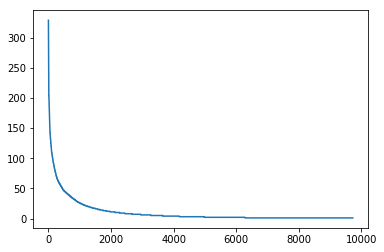

In [3]:
#Count number of rating for separate movie
counts=[]
rat_mat=np.matrix(rating)
movie_id_listarray=[]
for i in range(rat_mat.shape[1]):
    counts.append(np.count_nonzero(~np.isnan(rat_mat[:,i])))
movie_id_sort=np.argsort(counts)[::-1]
for j in range(len(movie_id_sort)):
    movie_id_listarray.append(str(movie_id_sort[j]))
counts_sort=np.sort(counts)[::-1]
plt.plot(counts_sort)

# Question 4
Plot the distribution of ratings among users. To be speciﬁc, the X-axis should be the user index ordered by decreasing frequency and the Y -axis should be the number of movies the user have rated. The requirement of the plot is similar to that in Question 3.

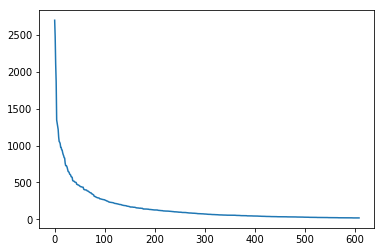

In [4]:
#Count number of rating for separate users
counts=[]
rat_mat=np.matrix(rating)
user_id_listarray=[]
for i in range(rat_mat.shape[0]):
    counts.append(np.count_nonzero(~np.isnan(rat_mat[i])))
user_id_sort=np.argsort(counts)[::-1]
for j in range(len(user_id_sort)):
    user_id_listarray.append(str(user_id_sort[j]))
counts_sort=np.sort(counts)[::-1]
plt.plot(counts_sort)

# Question 5
Explain the salient features of the distribution found in question 3 and their implications for the recommendation process.


# Question 6
 Compute the variance of the rating values received by each movie. Then, bin the variance values into intervals of width 0.5 and use the binned variance values as the horizontal axis. Count the number of movies with variance values in the binned intervals and use this count as the vertical axis. Brieﬂy comment on the shape of the histogram


The maximum rating value is
5.0625
The minimum rating value is
0.0


([<matplotlib.axis.XTick at 0x110da2210>,
 <a list of 12 Text xticklabel objects>)

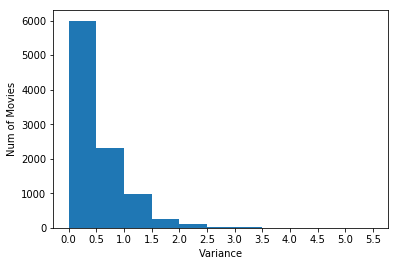

In [5]:
var=np.nanvar(rating,axis=0)
max_var=np.max(var)
min_var=np.min(var)
print('The maximum rating value is')
print(max_var)
print('The minimum rating value is')
print(min_var)
bins=np.arange(min_var,max_var+0.5,0.5)
plt.hist(var, bins=bins)
plt.xlabel('Variance')
plt.ylabel('Num of Movies')
plt.xticks(bins)

# Question 10
Design a k-NN collaborative ﬁlter to predict the ratings of the movies in the MovieLens dataset and evaluate it’s performance using 10-fold cross validation. Sweep k (number of neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average RMSE and average MAE obtained by averaging the RMSE and MAE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis) and average MAE (Y-axis) against k (X-axis).


In [5]:
#Import surprise class
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import KNNWithMeans
#Load Data with surprise and get a surprise.dataset for further convenience
reader = Reader(line_format='user item rating timestamp', sep=',',skip_lines=1)
data=Dataset.load_from_file('ratings.csv',reader=reader)# change this path into absolute path to "ratings.csv"

In [20]:
#KNN algorithm
RMSE=[]
MAE=[]
k_list=np.arange(2,102,2)
for k in k_list:
    Knn=KNNWithMeans(k=k,sim_options={'name':'pearson'},verbose=False)
    Crs_val=cross_validate(Knn,data,measures=['rmse','mae'],cv=10,verbose=False,n_jobs=-1)
    RMSE.append(np.mean(Crs_val['test_rmse']))
    MAE.append(np.mean(Crs_val['test_mae']))
    print('K is % d is done' %k)

K is  2 is done
K is  4 is done
K is  6 is done
K is  8 is done
K is  10 is done
K is  12 is done
K is  14 is done
K is  16 is done
K is  18 is done
K is  20 is done
K is  22 is done
K is  24 is done
K is  26 is done
K is  28 is done
K is  30 is done
K is  32 is done
K is  34 is done
K is  36 is done
K is  38 is done
K is  40 is done
K is  42 is done
K is  44 is done
K is  46 is done
K is  48 is done
K is  50 is done
K is  52 is done
K is  54 is done
K is  56 is done
K is  58 is done
K is  60 is done
K is  62 is done
K is  64 is done
K is  66 is done
K is  68 is done
K is  70 is done
K is  72 is done
K is  74 is done
K is  76 is done
K is  78 is done
K is  80 is done
K is  82 is done
K is  84 is done
K is  86 is done
K is  88 is done
K is  90 is done
K is  92 is done
K is  94 is done
K is  96 is done
K is  98 is done
K is  100 is done


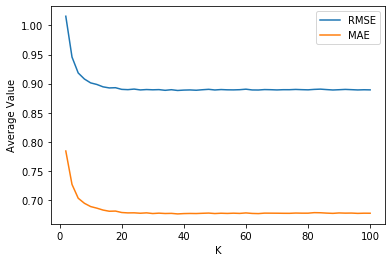

In [30]:
plt.plot(k_list,RMSE)
plt.plot(k_list,MAE)
plt.xlabel('K')
plt.ylabel('Average Value')
plt.legend(['RMSE','MAE'])
plt.show()

In [38]:
#print out RMSE and MAE value
print(RMSE)
print(MAE)

[1.015786325535298, 0.9456650566333561, 0.918317550743593, 0.9079129171584475, 0.901300464109511, 0.8985903335577463, 0.8944973185374845, 0.8926419061831629, 0.8930103989661411, 0.8901606958431589, 0.8896715577775922, 0.8906637199069813, 0.8891925002435203, 0.889852830177117, 0.889427213594751, 0.8897221775445298, 0.8885424331970562, 0.8895681636480075, 0.8882728046656834, 0.8889213365138815, 0.8891936566568432, 0.8886649594254548, 0.8895145899959163, 0.8902289980246947, 0.8891246545511642, 0.8898373299792549, 0.889384269584033, 0.8892803224283023, 0.8895897222723985, 0.8904755500816561, 0.8891730840590206, 0.8890616356126586, 0.8898014812041039, 0.8895887944843469, 0.8891958748569803, 0.8895914815683774, 0.8895743000763808, 0.8900424447215697, 0.889654883860544, 0.889358701154987, 0.8901227353015674, 0.8905526863936846, 0.8897797450253414, 0.8891039611518525, 0.889551923224235, 0.8900869479165694, 0.8896497356851583, 0.8891814119706641, 0.8894855121171453, 0.8892960906156826]
[0.78428

# Question 12
Design a k-NN collaborative ﬁlter to predict the ratings of the movies in the popular movie trimmed test set and evaluate it’s performance using 10-fold cross validation. Sweep k (number of neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE


In [8]:
from surprise.model_selection import KFold
from surprise import accuracy
k_folds=KFold(10)
RMSE_12=[]
k_list=np.arange(2,102,2)
for k in k_list:
    RMSE_sub=[]
    Knn=KNNWithMeans(k=k,sim_options={'name':'pearson'},verbose=False)
    
    for training_dataset, test_dataset in k_folds.split(data):
        Knn.fit(training_dataset)#model training
        #process test set into popular movie trimming
        #print(type(test_dataset))#test_dataset is a list with shape Nx3, columns indices are userid, movie id
        #print(np.shape(test_dataset))
        #print(test_dataset)
        df=pd.DataFrame(test_dataset,columns=['userId','movieId','ratings'])
        df_group=df.groupby('movieId')
        #print(df_group.get_group('2'))
        #kk=df_group.get_group('2')
        df_group_filtered=df_group.filter(lambda x: len(x)>2)#exclude movies which get less than 2 ratings
        pred = Knn.test(np.array(df_group_filtered).tolist())
        #computer each rmse for 10-folds
        RMSE_sub.append(accuracy.rmse(pred,verbose=False))
    #Average all rmse in RMSE_sub and save in RMSE_12, each value corresponds to one k 
    RMSE_12.append(np.mean(RMSE_sub))
    print('K is %d is done' %k)
    

K is 2 is done
K is 4 is done
K is 6 is done
K is 8 is done
K is 10 is done
K is 12 is done
K is 14 is done
K is 16 is done
K is 18 is done
K is 20 is done
K is 22 is done
K is 24 is done
K is 26 is done
K is 28 is done
K is 30 is done
K is 32 is done
K is 34 is done
K is 36 is done
K is 38 is done
K is 40 is done
K is 42 is done
K is 44 is done
K is 46 is done
K is 48 is done
K is 50 is done
K is 52 is done
K is 54 is done
K is 56 is done
K is 58 is done
K is 60 is done
K is 62 is done
K is 64 is done
K is 66 is done
K is 68 is done
K is 70 is done
K is 72 is done
K is 74 is done
K is 76 is done
K is 78 is done
K is 80 is done
K is 82 is done
K is 84 is done
K is 86 is done
K is 88 is done
K is 90 is done
K is 92 is done
K is 94 is done
K is 96 is done
K is 98 is done
K is 100 is done


The minimum value of RMSE is 
0.8539154344717155


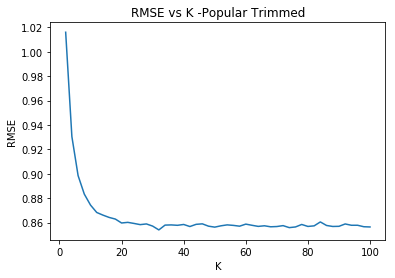

In [9]:
k_list=np.arange(2,102,2)
plt.plot(k_list,RMSE_12)
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('RMSE vs K -Popular Trimmed')
print('The minimum value of RMSE is ')
print(min(RMSE_12))

# Question 13
 Design a k-NN collaborative ﬁlter to predict the ratings of the movies in the unpopular movie trimmed test set and evaluate it’s performance using 10-fold cross validation. Sweep k (number of neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE


In [10]:
RMSE_13=[]
for k in k_list:
    RMSE_sub=[]
    Knn=KNNWithMeans(k=k,sim_options={'name':'pearson'},verbose=False)
    
    for training_dataset, test_dataset in k_folds.split(data):
        Knn.fit(training_dataset)#model training
        #process test set into popular movie trimming
        #print(type(test_dataset))#test_dataset is a list with shape Nx3, columns indices are userid, movie id
        #print(np.shape(test_dataset))
        #print(test_dataset)
        df=pd.DataFrame(test_dataset,columns=['userId','movieId','ratings'])
        df_group=df.groupby('movieId')
        #print(df_group.get_group('2'))
        #kk=df_group.get_group('2')
        df_group_filtered=df_group.filter(lambda x: len(x)<=2)#exclude movies which get greater than 2 ratings
        pred = Knn.test(np.array(df_group_filtered).tolist())
        #computer each rmse for 10-folds
        RMSE_sub.append(accuracy.rmse(pred,verbose=False))
    #Average all rmse in RMSE_sub and save in RMSE_12, each value corresponds to one k 
    RMSE_13.append(np.mean(RMSE_sub))
    print('K is %d is done' %k)

K is 2 is done
K is 4 is done
K is 6 is done
K is 8 is done
K is 10 is done
K is 12 is done
K is 14 is done
K is 16 is done
K is 18 is done
K is 20 is done
K is 22 is done
K is 24 is done
K is 26 is done
K is 28 is done
K is 30 is done
K is 32 is done
K is 34 is done
K is 36 is done
K is 38 is done
K is 40 is done
K is 42 is done
K is 44 is done
K is 46 is done
K is 48 is done
K is 50 is done
K is 52 is done
K is 54 is done
K is 56 is done
K is 58 is done
K is 60 is done
K is 62 is done
K is 64 is done
K is 66 is done
K is 68 is done
K is 70 is done
K is 72 is done
K is 74 is done
K is 76 is done
K is 78 is done
K is 80 is done
K is 82 is done
K is 84 is done
K is 86 is done
K is 88 is done
K is 90 is done
K is 92 is done
K is 94 is done
K is 96 is done
K is 98 is done
K is 100 is done


The minimum value of RMSE is 
0.9495766170710107


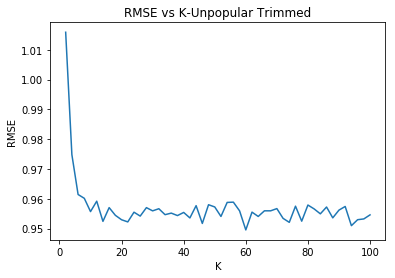

In [11]:
plt.plot(k_list,RMSE_13)
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('RMSE vs K-Unpopular Trimmed')

print('The minimum value of RMSE is ')
print(min(RMSE_13))

# Question 14
 In this trimming, we trim the test set to contain movies that have variance (of the rating values received) of at least 2 and has received at least 5 ratings in the entire dataset. To be speciﬁc, if a movie has variance less than 2 or has received less than 5 ratings in
the entire dataset then we delete that movie from the test set and do not predict the rating of that movie using the trained ﬁlter.


In [13]:
RMSE_14=[]
for k in k_list:
    RMSE_sub=[]
    Knn=KNNWithMeans(k=k,sim_options={'name':'pearson'},verbose=False)
    
    for training_dataset, test_dataset in k_folds.split(data):
        Knn.fit(training_dataset)#model training
        #process test set into popular movie trimming
        #print(type(test_dataset))#test_dataset is a list with shape Nx3, columns indices are userid, movie id
        #print(np.shape(test_dataset))
        #print(test_dataset)
        df=pd.DataFrame(test_dataset,columns=['userId','movieId','ratings'])
        df_group=df.groupby('movieId')
        #print(df_group.get_group('2'))
        #kk=df_group.get_group('2')
        df_group_filtered1=df_group.filter(lambda x: x['ratings'].var()>=2)
        df_group_filtered2=df_group_filtered1.groupby('movieId').filter(lambda x: len(x)>=5)
        pred = Knn.test(np.array(df_group_filtered2).tolist())
        #computer each rmse for 10-folds
        RMSE_sub.append(accuracy.rmse(pred,verbose=False))
    #Average all rmse in RMSE_sub and save in RMSE_12, each value corresponds to one k 
    RMSE_14.append(np.mean(RMSE_sub))
    print('K is %d is done' %k)

K is 2 is done
K is 4 is done
K is 6 is done
K is 8 is done
K is 10 is done
K is 12 is done
K is 14 is done
K is 16 is done
K is 18 is done
K is 20 is done
K is 22 is done
K is 24 is done
K is 26 is done
K is 28 is done
K is 30 is done
K is 32 is done
K is 34 is done
K is 36 is done
K is 38 is done
K is 40 is done
K is 42 is done
K is 44 is done
K is 46 is done
K is 48 is done
K is 50 is done
K is 52 is done
K is 54 is done
K is 56 is done
K is 58 is done
K is 60 is done
K is 62 is done
K is 64 is done
K is 66 is done
K is 68 is done
K is 70 is done
K is 72 is done
K is 74 is done
K is 76 is done
K is 78 is done
K is 80 is done
K is 82 is done
K is 84 is done
K is 86 is done
K is 88 is done
K is 90 is done
K is 92 is done
K is 94 is done
K is 96 is done
K is 98 is done
K is 100 is done


The minimum value of RMSE is 
1.3135613803950204


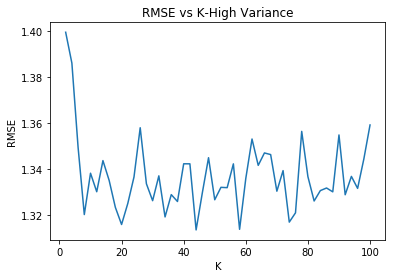

In [14]:
plt.plot(k_list,RMSE_14)
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('RMSE vs K-High Variance')
print('The minimum value of RMSE is ')
print(min(RMSE_14))

# Question 15
 Plot the ROC curves for the k-NN collaborative ﬁlter designed in question 10 for threshold values [2.5,3,3.5,4]. For the ROC plotting use the k found in question 11. For each of the plots, also report the area under the curve (AUC) value.


Threshold is 2.500000
Area under the curve value is 0.778921


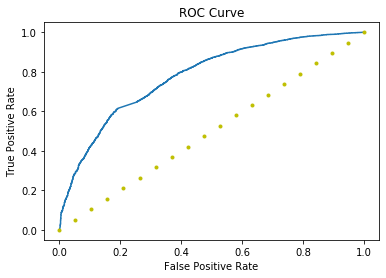

Threshold is 3.000000
Area under the curve value is 0.779849


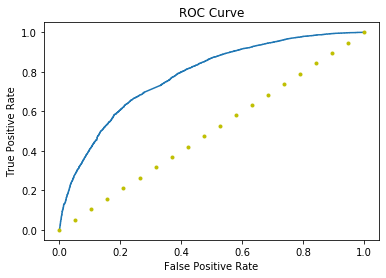

Threshold is 3.500000
Area under the curve value is 0.772945


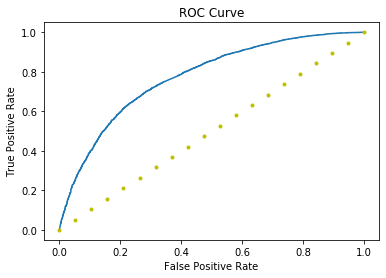

Threshold is 4.000000
Area under the curve value is 0.769047


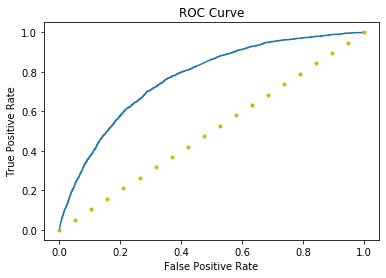

In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from surprise.model_selection import train_test_split
import matplotlib.pyplot as plt

threshold_list=[2.5,3,3.5,4]
k=22
for threshold in threshold_list:
    print('Threshold is %f' %threshold)
    training_set, test_set=train_test_split(data, test_size=0.1)
    Knn=KNNWithMeans(k=k,sim_options={'name':'pearson'},verbose=False)
    Knn.fit(training_set)
    label=[]
    score=[]
    pred=Knn.test(test_set)
    for i in range(len(pred)):
        score.append(pred[i][3])
        if pred[i][2] > threshold:
            label.append(1)
        else:
            label.append(0)
    fpr,tpr,thr=roc_curve(label,score)
    roc_auc=auc(fpr,tpr)
    print('Area under the curve value is %f' %roc_auc)
    plt.plot(fpr,tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    x=np.linspace(0,1,20)
    y=np.linspace(0,1,20)
    plt.plot(x,y,'.y')
    plt.show()

# Question 17
Design a NNMF-based collaborative ﬁlter to predict the ratings of the movies in the MovieLens dataset and evaluate it’s performance using 10-fold cross-validation. Sweep k (number of latent factors) from 2 to 50 in step sizes
of 2, and for each k compute the average RMSE and average MAE obtained by averaging the RMSE and MAE across all 10 folds. Plot the average RMSE (Y-axis) against k (X-axis) and the average MAE (Y-axis) against k (X-axis). For solving this question, use the default value for the regularization parameter

In [16]:
from surprise.prediction_algorithms.matrix_factorization import NMF
RMSE_17=[]
MAE_17=[]
k_list=np.arange(2,52,2)
for k in k_list:
    nmf=NMF(n_factors=k,biased=False)
    Crs_val=cross_validate(nmf,data,measures=['rmse','mae'],cv=10,verbose=False,n_jobs=-1)
    RMSE_17.append(np.mean(Crs_val['test_rmse']))
    MAE_17.append(np.mean(Crs_val['test_mae']))
    print('K is % d is done' %k)

K is  2 is done
K is  4 is done
K is  6 is done
K is  8 is done
K is  10 is done
K is  12 is done
K is  14 is done
K is  16 is done
K is  18 is done
K is  20 is done
K is  22 is done
K is  24 is done
K is  26 is done
K is  28 is done
K is  30 is done
K is  32 is done
K is  34 is done
K is  36 is done
K is  38 is done
K is  40 is done
K is  42 is done
K is  44 is done
K is  46 is done
K is  48 is done
K is  50 is done


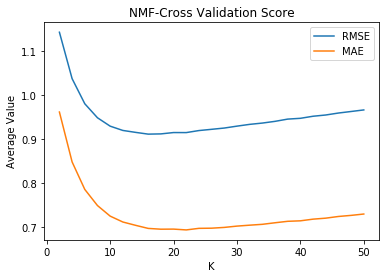

In [17]:
plt.plot(k_list,RMSE_17)
plt.plot(k_list,MAE_17)
plt.xlabel('K')
plt.ylabel('Average Value')
plt.legend(['RMSE','MAE'])
plt.title('NMF-Cross Validation Score')
plt.show()

# Question 18
Use the plot from question 17, to ﬁnd the optimal number of latent factors. Optimal number of latent factors is the value of k that gives the minimum average RMSE or the minimum average MAE. Please report the minimum average RMSE and MAE. Is the optimal number of latent factors same as the number of movie genres?


In [18]:
min_k_RMSE=(np.argmin(RMSE_17)+1)*2
min_k_MAE=(np.argmin(MAE_17)+1)*2
min_RMSE=np.min(RMSE_17)
min_MAE=np.min(MAE_17)
print('K corresponds to minimum RMSE is %d' %min_k_RMSE)
print('K corresponds to minimum AME is %d' %min_k_MAE)
print('The minimum RMSE is %f' %min_RMSE)
print('The minimum MAE is %f' %min_MAE)

K corresponds to minimum RMSE is 16
K corresponds to minimum AME is 22
The minimum RMSE is 0.911278
The minimum MAE is 0.692621


# Question 19
 Design a NNMF collaborative ﬁlter to predict the ratings of the movies in the popular movie trimmed test set and evaluate it’s performance using 10-fold cross validation. Sweep k (number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE


In [19]:
from surprise.prediction_algorithms.matrix_factorization import NMF
k_folds=KFold(10)
RMSE_18=[]
k_list=np.arange(2,52,2)
for k in k_list:
    RMSE_sub=[]
    nmf=NMF(n_factors=k,biased=False)
    
    for training_dataset, test_dataset in k_folds.split(data):
        nmf.fit(training_dataset)#model training
        
        df=pd.DataFrame(test_dataset,columns=['userId','movieId','ratings'])
        df_group=df.groupby('movieId')
        #print(df_group.get_group('2'))
        #kk=df_group.get_group('2')
        df_group_filtered=df_group.filter(lambda x: len(x)>2)#exclude movies which get less than 2 ratings
        pred = nmf.test(np.array(df_group_filtered).tolist())
        #computer each rmse for 10-folds
        RMSE_sub.append(accuracy.rmse(pred,verbose=False))
    #Average all rmse in RMSE_sub and save in RMSE_12, each value corresponds to one k 
    RMSE_18.append(np.mean(RMSE_sub))
    print('K is %d is done' %k)
    

K is 2 is done
K is 4 is done
K is 6 is done
K is 8 is done
K is 10 is done
K is 12 is done
K is 14 is done
K is 16 is done
K is 18 is done
K is 20 is done
K is 22 is done
K is 24 is done
K is 26 is done
K is 28 is done
K is 30 is done
K is 32 is done
K is 34 is done
K is 36 is done
K is 38 is done
K is 40 is done
K is 42 is done
K is 44 is done
K is 46 is done
K is 48 is done
K is 50 is done


The minimum value of RMSE is 
0.8719232333652622


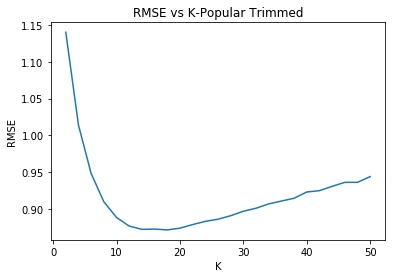

In [20]:
plt.plot(k_list,RMSE_18)
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('RMSE vs K-Popular Trimmed')
print('The minimum value of RMSE is ')
print(min(RMSE_18))

# Question 20
 Design a NNMF collaborative ﬁlter to predict the ratings of the movies in the unpopular movie trimmed test set and evaluate it’s performance using 10-fold cross validation. Sweep k (number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE


In [21]:
k_folds=KFold(10)
RMSE_20=[]
k_list=np.arange(2,52,2)
for k in k_list:
    RMSE_sub=[]
    nmf=NMF(n_factors=k,biased=False)
    
    for training_dataset, test_dataset in k_folds.split(data):
        nmf.fit(training_dataset)#model training
        
        df=pd.DataFrame(test_dataset,columns=['userId','movieId','ratings'])
        df_group=df.groupby('movieId')
        #print(df_group.get_group('2'))
        #kk=df_group.get_group('2')
        df_group_filtered=df_group.filter(lambda x: len(x)<=2)#exclude movies which get less than 2 ratings
        pred = nmf.test(np.array(df_group_filtered).tolist())
        #computer each rmse for 10-folds
        RMSE_sub.append(accuracy.rmse(pred,verbose=False))
    #Average all rmse in RMSE_sub and save in RMSE_12, each value corresponds to one k 
    RMSE_20.append(np.mean(RMSE_sub))
    print('K is %d is done' %k)

K is 2 is done
K is 4 is done
K is 6 is done
K is 8 is done
K is 10 is done
K is 12 is done
K is 14 is done
K is 16 is done
K is 18 is done
K is 20 is done
K is 22 is done
K is 24 is done
K is 26 is done
K is 28 is done
K is 30 is done
K is 32 is done
K is 34 is done
K is 36 is done
K is 38 is done
K is 40 is done
K is 42 is done
K is 44 is done
K is 46 is done
K is 48 is done
K is 50 is done


The minimum value of RMSE is 
0.9896954511534052


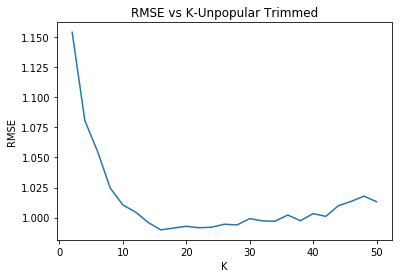

In [22]:
plt.plot(k_list,RMSE_20)
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('RMSE vs K-Unpopular Trimmed')
print('The minimum value of RMSE is ')
print(min(RMSE_20))

# Question 21
 Design a NNMF collaborative ﬁlter to predict the ratings of the movies in the high variance movie trimmed test set and evaluate it’s performance using 10-fold cross validation. Sweep k (number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE


In [23]:
RMSE_21=[]
for k in k_list:
    RMSE_sub=[]
    nmf=NMF(n_factors=k,biased=False)
    
    for training_dataset, test_dataset in k_folds.split(data):
        nmf.fit(training_dataset)#model training
        df=pd.DataFrame(test_dataset,columns=['userId','movieId','ratings'])
        df_group=df.groupby('movieId')
        df_group_filtered1=df_group.filter(lambda x: x['ratings'].var()>=2)
        df_group_filtered2=df_group_filtered1.groupby('movieId').filter(lambda x: len(x)>=5)
        pred = nmf.test(np.array(df_group_filtered2).tolist())
        #computer each rmse for 10-folds
        RMSE_sub.append(accuracy.rmse(pred,verbose=False))
    #Average all rmse in RMSE_sub and save in RMSE_12, each value corresponds to one k 
    RMSE_21.append(np.mean(RMSE_sub))
    print('K is %d is done' %k)

K is 2 is done
K is 4 is done
K is 6 is done
K is 8 is done
K is 10 is done
K is 12 is done
K is 14 is done
K is 16 is done
K is 18 is done
K is 20 is done
K is 22 is done
K is 24 is done
K is 26 is done
K is 28 is done
K is 30 is done
K is 32 is done
K is 34 is done
K is 36 is done
K is 38 is done
K is 40 is done
K is 42 is done
K is 44 is done
K is 46 is done
K is 48 is done
K is 50 is done


The minimum value of RMSE is 
1.313804202571219


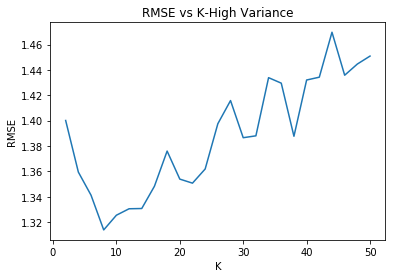

In [24]:
plt.plot(k_list,RMSE_21)
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('RMSE vs K-High Variance')
print('The minimum value of RMSE is ')
print(min(RMSE_21))

# Question 22
Plot the ROC curves for the NNMF-based collaborative ﬁlter designed in question 17 for threshold values [2.5,3,3.5,4]. For the ROC plotting use the optimal number of latent factors found in question 18. For each of the plots, also report the area under the curve (AUC) value.


Threshold is 2.500000
Area under the curve value is 0.772114


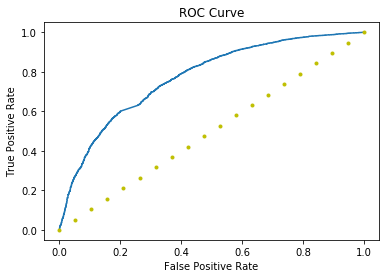

Threshold is 3.000000
Area under the curve value is 0.753798


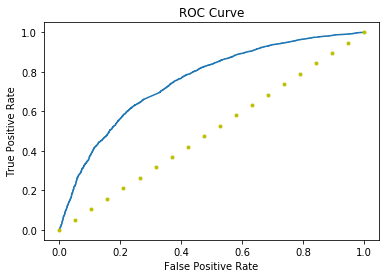

Threshold is 3.500000
Area under the curve value is 0.765838


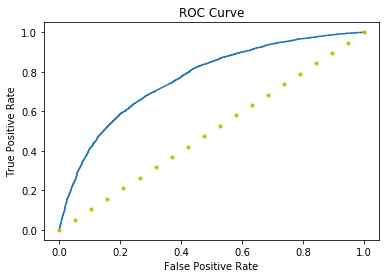

Threshold is 4.000000
Area under the curve value is 0.757111


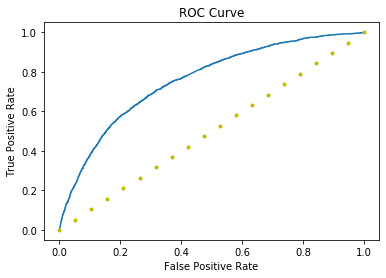

In [14]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from surprise.model_selection import train_test_split
from surprise.prediction_algorithms.matrix_factorization import NMF
threshold_list=[2.5,3,3.5,4]
#k=min_k_RMSE
k=16#k=16 corresponds to minimum RMSE
for threshold in threshold_list:
    print('Threshold is %f' %threshold)
    training_set, test_set=train_test_split(data, test_size=0.1)
    nmf=NMF(n_factors=k,biased=False)
    nmf.fit(training_set)
    label=[]
    score=[]
    pred=nmf.test(test_set)
    for i in range(len(pred)):
        score.append(pred[i][3])
        if pred[i][2] > threshold:
            label.append(1)
        else:
            label.append(0)
    fpr,tpr,thr=roc_curve(label,score)
    roc_auc=auc(fpr,tpr)
    print('Area under the curve value is %f' %roc_auc)
    plt.plot(fpr,tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    x=np.linspace(0,1,20)
    y=np.linspace(0,1,20)
    plt.plot(x,y,'.y')
    plt.show()

# Question 23
 Perform Non-negative matrix factorization on the ratings matrix R to obtain the factor matrices U and V , where U represents the user-latent factors interaction and V represents the movie-latent factors interaction (use k = 20). For each column of V , sort the movies in descending order and report the genres of the top 10 movies. Do the top 10 movies belong to a particular or a small collection of genre? Is there a connection between the latent factors and the movie genres?


In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
data=pd.read_csv('ratings.csv')#please change this path into absolute path to "ratings.csv"
rating_matrix_0 = data.pivot(index='userId', columns='movieId', values='rating').fillna(0)
nmf= NMF(n_components=20, init = 'random', random_state=42)
nmf.fit_transform(rating_matrix_0)
V=nmf.components_.T#FxK
movie_id=rating_matrix_0.columns.values#save all movie id in an array which is (9724,0)
movies=pd.read_csv('movies.csv')# please change this path into absolute path to "movies.csv"
for i in range(20):
    V_inc=np.argsort(V[:,i])#Sort the ith column in increasing order
    V_dec=np.flip(V_inc)# flip it into decreaseing order, so the greatest one has index 0
    V_dec_10=V_dec[:10]
    ge=[]
    for j in V_dec_10:
        ge.append(movies.loc[j,'genres'])
    print('The %i th column is ' %(i+1))
    print(pd.DataFrame(ge,columns=['genres']))

The 1 th column is 
                               genres
0                               Crime
1                              Comedy
2      Adventure|Drama|Romance|Sci-Fi
3                   Animation|Musical
4                        Action|Drama
5                              Comedy
6                      Comedy|Romance
7                              Comedy
8  Animation|Children|Fantasy|Musical
9                               Drama
The 2 th column is 
                           genres
0                 Sci-Fi|Thriller
1                     Documentary
2                    Comedy|Crime
3  Fantasy|Horror|Mystery|Romance
4                   Drama|Romance
5                           Drama
6                    Comedy|Drama
7          Action|Sci-Fi|Thriller
8                          Comedy
9    Comedy|Drama|Musical|Romance
The 3 th column is 
                      genres
0              Drama|Romance
1  Action|Adventure|Thriller
2             Comedy|Romance
3               Comedy|Drama
4  

# Question 24
Design a MF with bias collaborative ﬁlter to predict the ratings of the movies in the MovieLens dataset and evaluate it’s performance using 10-fold cross-validation. Sweep k (number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE and average MAE obtained by averaging the RMSE and MAE across all 10 folds. Plot the average RMSE (Y-axis) against k (X-axis) and the average MAE (Y-axis) against k (X-axis). For solving this question, use the default value for the regularization parameter.


In [27]:
from surprise.prediction_algorithms.matrix_factorization import SVD

RMSE_24=[]
MAE_24=[]
k_list=np.arange(2,52,2)
data=Dataset.load_from_file('ratings.csv',reader=reader)#Please change this path into absolute path to "ratings.csv"
for k in k_list:
    svd=SVD(n_factors=k,biased=True)
    Crs_val=cross_validate(svd,data,measures=['rmse','mae'],cv=10,verbose=False,n_jobs=-1)
    RMSE_24.append(np.mean(Crs_val['test_rmse']))
    MAE_24.append(np.mean(Crs_val['test_mae']))
    print('K is % d is done' %k)
    

K is  2 is done
K is  4 is done
K is  6 is done
K is  8 is done
K is  10 is done
K is  12 is done
K is  14 is done
K is  16 is done
K is  18 is done
K is  20 is done
K is  22 is done
K is  24 is done
K is  26 is done
K is  28 is done
K is  30 is done
K is  32 is done
K is  34 is done
K is  36 is done
K is  38 is done
K is  40 is done
K is  42 is done
K is  44 is done
K is  46 is done
K is  48 is done
K is  50 is done


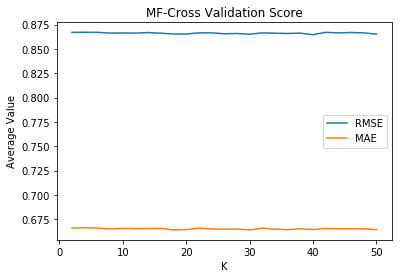

In [28]:
plt.plot(k_list,RMSE_24)
plt.plot(k_list,MAE_24)
plt.xlabel('K')
plt.ylabel('Average Value')
plt.legend(['RMSE','MAE'])
plt.title('MF-Cross Validation Score')
plt.show()

# Question 25
 Use the plot from question 24, to ﬁnd the optimal number of latent factors. Optimal number of latent factors is the value of k that gives the minimum average RMSE or the minimum average MAE. Please report the minimum average RMSE and MAE.


In [29]:
min_k_RMSE=(np.argmin(RMSE_24)+1)*2
min_k_MAE=(np.argmin(MAE_24)+1)*2
min_RMSE=np.min(RMSE_24)
min_MAE=np.min(MAE_24)
print('K corresponds to minimum RMSE is %d' %min_k_RMSE)
print('K corresponds to minimum AME is %d' %min_k_MAE)
print('The minimum RMSE is %f' %min_RMSE)
print('The minimum MAE is %f' %min_MAE)

K corresponds to minimum RMSE is 40
K corresponds to minimum AME is 30
The minimum RMSE is 0.864492
The minimum MAE is 0.664058


# Question 26
 Design a MF with bias collaborative ﬁlter to predict the ratings of the movies in the popular movie trimmed test set and evaluate it’s performance using 10-fold cross validation. Sweep k (number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE


In [30]:

k_folds=KFold(10)
RMSE_26=[]
k_list=np.arange(2,52,2)
for k in k_list:
    RMSE_sub=[]
    svd=SVD(n_factors=k,biased=True)
    
    for training_dataset, test_dataset in k_folds.split(data):
        svd.fit(training_dataset)#model training
        
        df=pd.DataFrame(test_dataset,columns=['userId','movieId','ratings'])
        df_group=df.groupby('movieId')
        #print(df_group.get_group('2'))
        #kk=df_group.get_group('2')
        df_group_filtered=df_group.filter(lambda x: len(x)>2)#exclude movies which get less than 2 ratings
        pred = svd.test(np.array(df_group_filtered).tolist())
        #computer each rmse for 10-folds
        RMSE_sub.append(accuracy.rmse(pred,verbose=False))
    #Average all rmse in RMSE_sub and save in RMSE_12, each value corresponds to one k 
    RMSE_26.append(np.mean(RMSE_sub))
    print('K is %d is done' %k)
    

K is 2 is done
K is 4 is done
K is 6 is done
K is 8 is done
K is 10 is done
K is 12 is done
K is 14 is done
K is 16 is done
K is 18 is done
K is 20 is done
K is 22 is done
K is 24 is done
K is 26 is done
K is 28 is done
K is 30 is done
K is 32 is done
K is 34 is done
K is 36 is done
K is 38 is done
K is 40 is done
K is 42 is done
K is 44 is done
K is 46 is done
K is 48 is done
K is 50 is done


The minimum value of RMSE is 
0.8459150878989391


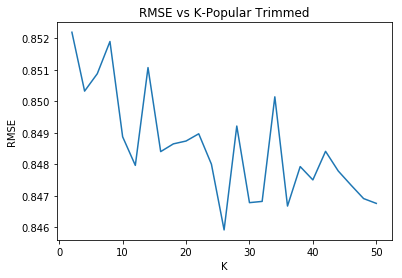

In [31]:
plt.plot(k_list,RMSE_26)
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('RMSE vs K-Popular Trimmed')
print('The minimum value of RMSE is ')
print(min(RMSE_26))

# Question 27
Design a MF with bias collaborative ﬁlter to predict the ratings of the movies in the unpopular movie trimmed test set and evaluate it’s performance using 10-fold cross validation. Sweep k (number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE

In [32]:
k_folds=KFold(10)
RMSE_27=[]
k_list=np.arange(2,52,2)
for k in k_list:
    RMSE_sub=[]
    svd=SVD(n_factors=k,biased=True)
    
    for training_dataset, test_dataset in k_folds.split(data):
        svd.fit(training_dataset)#model training
        
        df=pd.DataFrame(test_dataset,columns=['userId','movieId','ratings'])
        df_group=df.groupby('movieId')
        #print(df_group.get_group('2'))
        #kk=df_group.get_group('2')
        df_group_filtered=df_group.filter(lambda x: len(x)<=2)#exclude movies which get less than 2 ratings
        pred = svd.test(np.array(df_group_filtered).tolist())
        #computer each rmse for 10-folds
        RMSE_sub.append(accuracy.rmse(pred,verbose=False))
    #Average all rmse in RMSE_sub and save in RMSE_12, each value corresponds to one k 
    RMSE_27.append(np.mean(RMSE_sub))
    print('K is %d is done' %k)

K is 2 is done
K is 4 is done
K is 6 is done
K is 8 is done
K is 10 is done
K is 12 is done
K is 14 is done
K is 16 is done
K is 18 is done
K is 20 is done
K is 22 is done
K is 24 is done
K is 26 is done
K is 28 is done
K is 30 is done
K is 32 is done
K is 34 is done
K is 36 is done
K is 38 is done
K is 40 is done
K is 42 is done
K is 44 is done
K is 46 is done
K is 48 is done
K is 50 is done


The minimum value of RMSE is 
0.8960494979208313


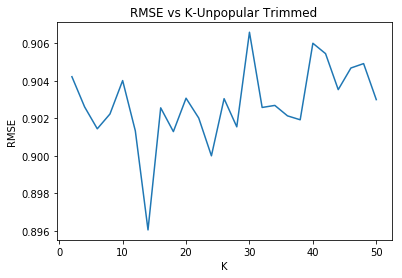

In [33]:
plt.plot(k_list,RMSE_27)
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('RMSE vs K-Unpopular Trimmed')
print('The minimum value of RMSE is ')
print(min(RMSE_27))

# Question 28
 Design a MF with bias collaborative ﬁlter to predict the ratings of the movies in the high variance movie trimmed test set and evaluate it’s performance using 10-fold cross validation. Sweep k (number of latent factors)
from 2 to 50 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE


In [34]:
RMSE_28=[]
for k in k_list:
    RMSE_sub=[]
    svd=SVD(n_factors=k,biased=True)
    
    for training_dataset, test_dataset in k_folds.split(data):
        svd.fit(training_dataset)#model training
        df=pd.DataFrame(test_dataset,columns=['userId','movieId','ratings'])
        df_group=df.groupby('movieId')
        df_group_filtered1=df_group.filter(lambda x: x['ratings'].var()>=2)
        df_group_filtered2=df_group_filtered1.groupby('movieId').filter(lambda x: len(x)>=5)
        pred = svd.test(np.array(df_group_filtered2).tolist())
        #computer each rmse for 10-folds
        RMSE_sub.append(accuracy.rmse(pred,verbose=False))
    #Average all rmse in RMSE_sub and save in RMSE_12, each value corresponds to one k 
    RMSE_28.append(np.mean(RMSE_sub))
    print('K is %d is done' %k)

K is 2 is done
K is 4 is done
K is 6 is done
K is 8 is done
K is 10 is done
K is 12 is done
K is 14 is done
K is 16 is done
K is 18 is done
K is 20 is done
K is 22 is done
K is 24 is done
K is 26 is done
K is 28 is done
K is 30 is done
K is 32 is done
K is 34 is done
K is 36 is done
K is 38 is done
K is 40 is done
K is 42 is done
K is 44 is done
K is 46 is done
K is 48 is done
K is 50 is done


The minimum value of RMSE is 
1.317981027519453


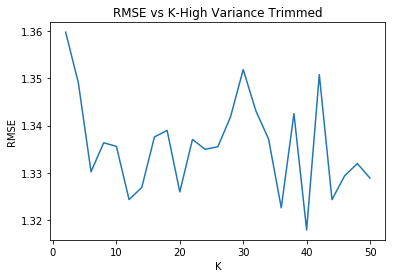

In [35]:
plt.plot(k_list,RMSE_28)
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('RMSE vs K-High Variance Trimmed')
print('The minimum value of RMSE is ')
print(min(RMSE_28))

# Question 29
Plot the ROC curves for the MF with bias collaborative ﬁlter designed in question 24 for threshold values [2.5,3,3.5,4]. For the ROC plotting use the optimal number of latent factors found in question 25. For each of the plots, also report the area under the curve (AUC) value

Threshold is 2.500000
Area under the curve value is 0.798841


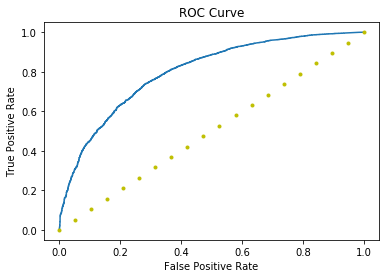

Threshold is 3.000000
Area under the curve value is 0.777316


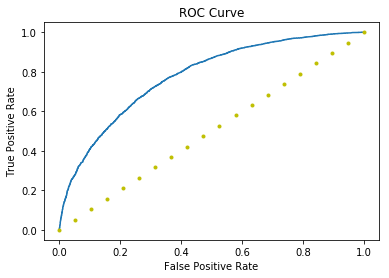

Threshold is 3.500000
Area under the curve value is 0.788821


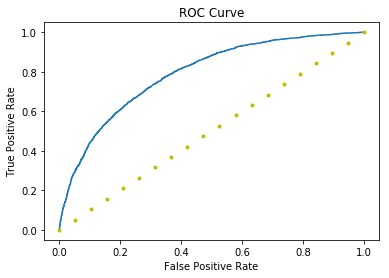

Threshold is 4.000000
Area under the curve value is 0.784498


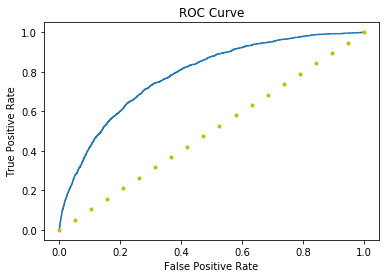

In [36]:


threshold_list=[2.5,3,3.5,4]
k=min_k_RMSE#k=40 corresponds to minimum RMSE
for threshold in threshold_list:
    print('Threshold is %f' %threshold)
    training_set, test_set=train_test_split(data, test_size=0.1)
    svd=SVD(n_factors=k,biased=True)
    svd.fit(training_set)
    label=[]
    score=[]
    pred=svd.test(test_set)
    for i in range(len(pred)):
        score.append(pred[i][3])
        if pred[i][2] > threshold:
            label.append(1)
        else:
            label.append(0)
    fpr,tpr,thr=roc_curve(label,score)
    roc_auc=auc(fpr,tpr)
    print('Area under the curve value is %f' %roc_auc)
    plt.plot(fpr,tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    x=np.linspace(0,1,20)
    y=np.linspace(0,1,20)
    plt.plot(x,y,'.y')
    plt.show()